# CNN( Pytorch)

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torchsummary import summary

C:\Users\marat\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data loading

In [2]:
#setup training set
#transforming the PIL Image to tensors
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True,
                                         download = True, transform = transforms.ToTensor())

100%|████████████████████████████████████████████████████████████████| 170498071/170498071 [03:40<00:00, 773281.47it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
#loading the training data from trainset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)

In [5]:
#iterating into the data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape) 
print(images[1].shape)
print(labels[1].item()) 

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


## Visualise data

In [6]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
#image = height * width * channels
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


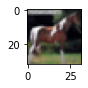

In [9]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

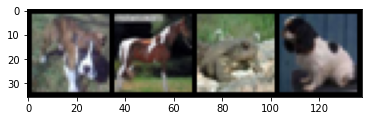

dog horse frog dog


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [12]:
class FirstCNN(nn.Module):
  
  def __init__(self):
    super(FirstCNN, self).__init__()
    #single layer convolution
    self.conv1 = nn.Conv2d(3, 16, 3, padding = (1,1), stride = (2, 2))
    
  def forward(self, x):
    #execute forward pass
    x = self.conv1(x)
    return(x)

In [13]:
#create a object of class
net = FirstCNN()

In [14]:
#print summary of network
print(net)

FirstCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)


In [15]:
#input shape
images.shape

torch.Size([4, 3, 32, 32])

In [16]:
#output from the convolution
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [17]:
#total parameters in a network
for param in net.parameters():
    print(param.shape, "Parameters")

torch.Size([16, 3, 3, 3]) Parameters
torch.Size([16]) Parameters


In [18]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


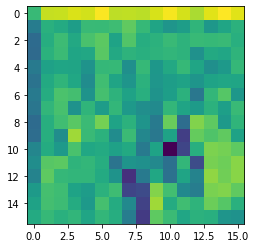

<Figure size 20000x20000 with 0 Axes>

In [19]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.figure(figsize = (10,10), dpi = 2000)
plt.show()


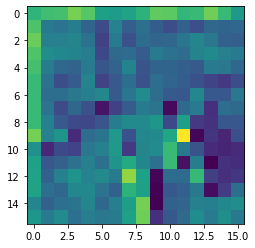

<Figure size 720x720 with 0 Axes>

In [20]:
plt.imshow(out[0, 1, :, :].detach().numpy())
plt.figure(figsize = (10,10))
plt.show()

## Deep Convolutional Network

In [21]:
class FirstDeepCNN(nn.Module):
    def __init__(self): 
        super(FirstDeepCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          
            nn.AvgPool2d(kernel_size = 2, stride=2), 
            nn.Conv2d(6, 16, 5),        
            nn.AvgPool2d(2, stride=2)   
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
net = FirstDeepCNN()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

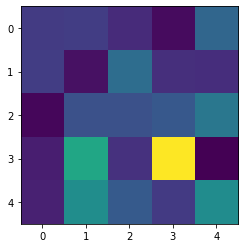

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

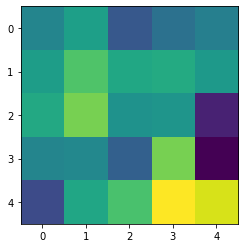

In [24]:
plt.imshow(out[0, 1, :, :].detach().numpy())
plt.show()

## LeNet


In [25]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, kernel_size = 5), 
        nn.Tanh(),
        nn.AvgPool2d(2, stride = 2), 
        nn.Conv2d(6, 16, kernel_size = 5), 
        nn.Tanh(),
        nn.AvgPool2d(2, stride = 2) 
    )
    
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120), 
        nn.Tanh(),
        nn.Linear(120, 84), 
        nn.Tanh(),
        nn.Linear(84, 10) 
    )
    
  def forward(self, x):
      print(x.shape)
      x = self.cnn_model(x)
      print(x.shape)
      print(x)
      x = x.view(x.size(0), -1)
      print(x.shape)
      x = self.fc_model(x)
      print(x.shape)
      return x

In [26]:
net = LeNet()
#running the lenet cnn
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
tensor([[[[-3.2798e-01, -3.4134e-01, -3.4228e-01, -3.2426e-01, -3.3492e-01],
          [-3.2072e-01, -3.4044e-01, -3.3849e-01, -3.3855e-01, -2.9630e-01],
          [-2.7815e-01, -3.3031e-01, -3.9747e-01, -3.7458e-01, -2.3280e-01],
          [-2.9066e-01, -3.8698e-01, -3.8033e-01, -4.4147e-01, -2.4260e-01],
          [-3.1443e-01, -4.4367e-01, -3.7101e-01, -4.0990e-01, -2.7474e-01]],

         [[-9.4017e-03,  1.9167e-03, -1.1432e-02, -4.8809e-04,  6.8766e-03],
          [-1.3681e-03, -2.3724e-03, -6.7315e-03, -2.8127e-02,  1.4658e-02],
          [-9.4224e-03, -4.8998e-03, -1.2207e-02, -6.3902e-02,  3.1066e-03],
          [-2.6791e-02, -7.8768e-04, -2.1211e-02, -3.4196e-02, -3.9244e-02],
          [ 9.0283e-03, -3.3049e-02, -2.0390e-02, -7.6026e-03, -7.6783e-02]],

         [[ 1.4807e-01,  1.4032e-01,  1.3847e-01,  1.4227e-01,  1.3497e-01],
          [ 1.2915e-01,  1.0352e-01,  1.5022e-01,  1.4588e-01,  1.6663e-01],
          [ 1.0905e

In [27]:
#printing the class probabilities for 4 different images
print(out)

tensor([[-0.0617, -0.1104, -0.0873, -0.0026,  0.1109,  0.0660,  0.1142,  0.0307,
         -0.1570,  0.0821],
        [-0.0747, -0.1038, -0.1008,  0.0208,  0.0912,  0.0587,  0.1086,  0.0159,
         -0.1497,  0.0781],
        [-0.0647, -0.0844, -0.0752,  0.0237,  0.1101,  0.0718,  0.1089,  0.0271,
         -0.1652,  0.0685],
        [-0.0835, -0.0878, -0.0897,  0.0107,  0.1397,  0.0636,  0.1385,  0.0272,
         -0.1675,  0.0783]], grad_fn=<AddmmBackward0>)


In [28]:
#taking only the maximum value 
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([6, 6, 4, 4])


In [29]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [30]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [31]:
def evaluation(dataloader):
  #function to calculate the accuracy
    total, correct = 0, 0
    for data in dataloader:
      inputs, labels = data
      outputs = net(inputs)
      _, pred = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    return(100 * correct/total)

In [32]:
#create an object of LeNet class, 
net = LeNet()

In [33]:
import torch.optim as optim

#define the loss function 
loss_fn = nn.CrossEntropyLoss()
#using the adam optimizer for backpropagation
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 38.45, Train acc: 38.47
Epoch: 1/10, Test acc: 43.28, Train acc: 43.40
Epoch: 2/10, Test acc: 45.33, Train acc: 46.37
Epoch: 3/10, Test acc: 49.72, Train acc: 51.20
Epoch: 4/10, Test acc: 51.69, Train acc: 53.42
Epoch: 5/10, Test acc: 52.89, Train acc: 55.77
Epoch: 6/10, Test acc: 52.72, Train acc: 56.85
Epoch: 7/10, Test acc: 54.59, Train acc: 59.13
Epoch: 8/10, Test acc: 54.92, Train acc: 59.71
Epoch: 9/10, Test acc: 55.62, Train acc: 61.45


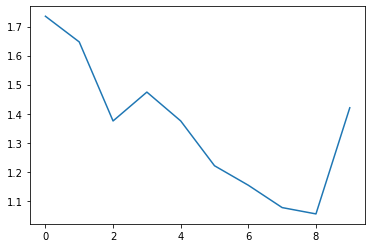

CPU times: total: 18min 11s
Wall time: 3min 4s


In [34]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        
        #backward and optimize
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [36]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [37]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [38]:
%%time
max_epochs = 100

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/100
Epoch: 1/100
Epoch: 2/100
Epoch: 3/100
Epoch: 4/100
Epoch: 5/100
Epoch: 6/100
Epoch: 7/100
Epoch: 8/100
Epoch: 9/100
Epoch: 10/100
Epoch: 11/100
Epoch: 12/100
Epoch: 13/100
Epoch: 14/100
Epoch: 15/100
Epoch: 16/100
Epoch: 17/100
Epoch: 18/100
Epoch: 19/100
Epoch: 20/100
Epoch: 21/100
Epoch: 22/100
Epoch: 23/100
Epoch: 24/100
Epoch: 25/100
Epoch: 26/100
Epoch: 27/100
Epoch: 28/100
Epoch: 29/100
Epoch: 30/100
Epoch: 31/100
Epoch: 32/100
Epoch: 33/100
Epoch: 34/100
Epoch: 35/100
Epoch: 36/100
Epoch: 37/100
Epoch: 38/100
Epoch: 39/100
Epoch: 40/100
Epoch: 41/100
Epoch: 42/100
Epoch: 43/100
Epoch: 44/100
Epoch: 45/100
Epoch: 46/100
Epoch: 47/100
Epoch: 48/100
Epoch: 49/100
Epoch: 50/100
Epoch: 51/100
Epoch: 52/100
Epoch: 53/100
Epoch: 54/100
Epoch: 55/100
Epoch: 56/100
Epoch: 57/100
Epoch: 58/100
Epoch: 59/100
Epoch: 60/100
Epoch: 61/100
Epoch: 62/100
Epoch: 63/100
Epoch: 64/100
Epoch: 65/100
Epoch: 66/100
Epoch: 67/100
Epoch: 68/100
Epoch: 69/100
Epoch: 70/100
Epoch: 71/100
Ep

In [39]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 51.79, Train acc: 95.64


## Basic Visualisation

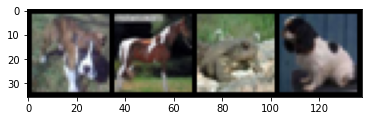

In [40]:
imshow(torchvision.utils.make_grid(images))

In [41]:
net = net.to('cpu')

In [42]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [43]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

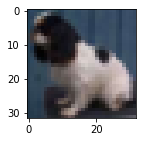

In [44]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

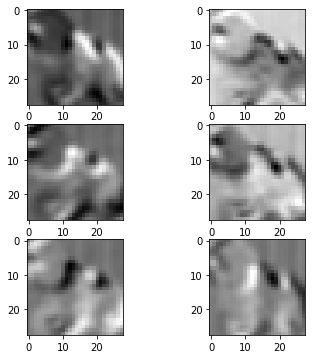

In [45]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()